In [1]:
import main
import numpy as np

In [2]:
paths = ['Data/ydata']
main.read_news_data(paths)

4460598 events read with 55 articles
Skipped broken events: 221394


In [3]:
from mab import Egreedy, ThompsonSampling, Ucb1, LinUcb
from matplotlib import pyplot as plt

In [4]:
_ , res = main.run(Egreedy(0.1, main.arms_number))
rounds = res[-1]

E-Greedy e=0.1
Execution time:  24.9s
CTR achieved:  0.0574


E-Greedy e=0.01
Execution time:  24.8s
CTR achieved:  0.0465
E-Greedy e=0.01
Execution time:  24.5s
CTR achieved:  0.0519
E-Greedy e=0.01
Execution time:  24.2s
CTR achieved:  0.0558
E-Greedy e=0.01
Execution time:  24.4s
CTR achieved:  0.0654


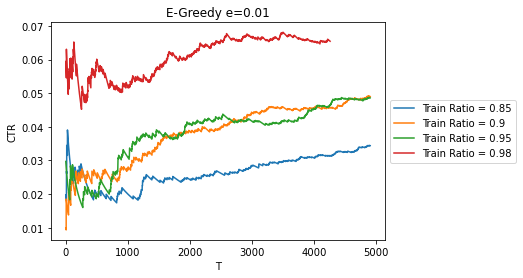

ThompsonSampling
Execution time:  1.7m
CTR achieved:  0.0592
ThompsonSampling
Execution time:  1.6m
CTR achieved:  0.0641
ThompsonSampling
Execution time:  1.6m
CTR achieved:  0.0598
ThompsonSampling
Execution time:  1.6m
CTR achieved:  0.0568


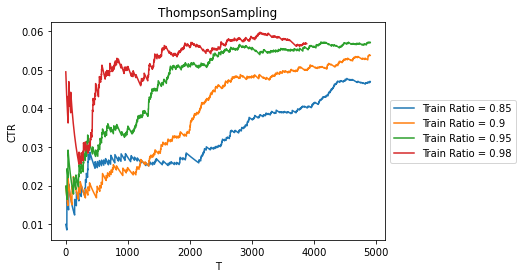

UCB1 α=0.01
Execution time:  53.2s
CTR achieved:  0.0571
UCB1 α=0.01
Execution time:  53.2s
CTR achieved:  0.0583
UCB1 α=0.01
Execution time:  53.2s
CTR achieved:  0.0606
UCB1 α=0.01
Execution time:  53.3s
CTR achieved:  0.052


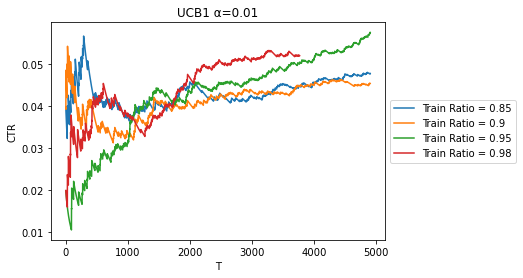

LinUcb alpha=0.3
Execution time:  123.6m
CTR achieved:  0.0639
LinUcb alpha=0.3
Execution time:  129.4m
CTR achieved:  0.0698
LinUcb alpha=0.3
Execution time:  118.5m
CTR achieved:  0.0683
LinUcb alpha=0.3
Execution time:  116.4m
CTR achieved:  0.0657


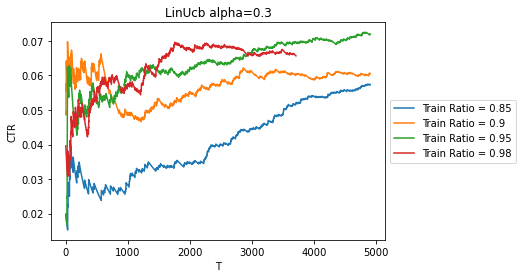

In [5]:
bandits = [Egreedy(0.01, main.arms_number), ThompsonSampling(main.arms_number), Ucb1(0.01, main.arms_number), LinUcb(0.3, main.arms_number)]
ratios = [0.85,0.9,0.95,0.98]
results = [['Ratio','Type','Algorithm','CTR Lift']]

for b in bandits:
    for r in ratios:
        train, test = main.run(b, r)
        results.append([r,'train', b.name, train[-1]/rounds])
        results.append([r,'test', b.name, test[-1]/rounds])

        plt.plot(test[100:5000], label="Train Ratio = {}".format(r))
    plt.title(b.name)
    plt.xlabel("T")
    plt.ylabel("CTR")
    plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    plt.show()